## Download and plot NASA EARTH Data
**Author:** Ana Vaz based on Eli Holmes (NOAA)</br>
Last updated: Jan 29, 2026

In [ ]:
# If running in Colab, uncomment (delete the #) and run this line
!pip install xarray earthaccess cartopy

In [1]:
# import packages
import earthaccess
import xarray as xr

#authenticate NASA Earthdata
auth = earthaccess.login(persist=True)

# Level 3 data for CHL
# Bounding box 
# bounding_box = (lon_min, lat_min, lon_max, lat_max)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_CHL',
    granule_name="*.8D.*.4km.*",
    temporal = ("2025-02-22", "2025-02-22"),
    bounding_box = (-77, 35, -71.5, 41.0)
)

#look at size and the link for results
len(results)
results[0]

# set a file pointer : We use earthaccess’s open() method to 
# create a ‘fileset’ to the cloud objects with the info needed 
# to open data in cloud buckets
fileset = earthaccess.open(results)

# Step 2 Read the file using `xarray.open_dataset()`
# We can load the information about the data and look at 
# its properties without actually loading all the data into memory.
# Open with xarray
import xarray as xr
ds = xr.open_dataset(fileset[0], chunks={})
ds

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB dask.array<chunksize=(512, 1024), meta=np.ndarray>
    palette  (rgb, eightbitcolor) uint8 768B dask.array<chunksize=(3, 256), meta=np.ndarray>
Attributes: (12/64)
    product_name:                      PACE_OCI.20250218_20250225.L3m.8D.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         14686886
    data_minimum:                      0.0009999999
    data_maximum:                      98.681076

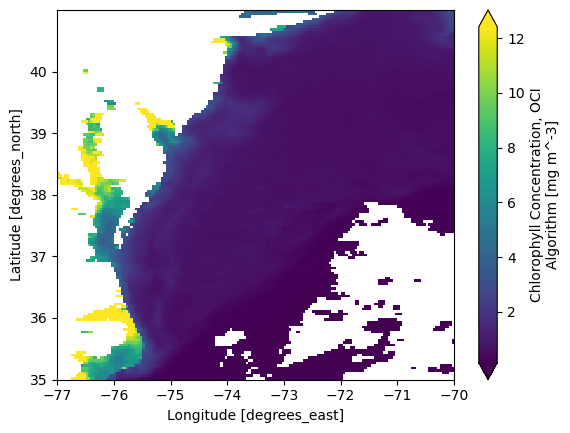

In [19]:
# We have "lazy" loaded the data, not loaded into memory.
# here are the variable
ds['chlor_a']

# Plot
chlr = ds["chlor_a"]

chlr_sub = chlr.sel(
    lat=slice(41, 35),
    lon=slice(-77, -70)
)

chlr_sub.plot(robust=True)

#### Open the data set 

In [22]:
# Import pandas
import pandas as pd

# Read the CSV file
# The file path in your Jupyter notebook environment is:
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

# Take a quick look at the data
print(f"Total observations: {len(obs)}")
print("\nFirst few rows:")
obs.head()

Total observations: 121

First few rows:


,dataset_id,row_id,latitude,longitude,species_name,scientific_name,common_name,itis_tsn,group_size,series_id,...,edit1,edit2,edit3,misc_edit1,misc_edit2,misc_edit3,misc_edit4,rid,event_t,datetime_et
0,2368,2368_10,37.14515,-74.54101,FIWH,Balaenoptera physalus,Fin whale,180527,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5037879,NaN,28-DEC-24 11.33.07.000000000 AM
1,2368,2368_106,38.31930,-73.84825,FIWH,Balaenoptera physalus,Fin whale,180527,1,NaN,...,sigcom from unlw,NaN,NaN,NaN,NaN,NaN,NaN,5074256,NaN,22-FEB-25 02.46.46.000000000 PM
2,2368,2368_107,38.31815,-73.85002,FIWH,Balaenoptera physalus,Fin whale,180527,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074280,NaN,22-FEB-25 02.50.02.000000000 PM
3,2368,2368_108,38.30965,-73.82714,HUWH,Megaptera novaeangliae,Humpback whale,180530,2,NaN,...,sigcom from unlw,NaN,NaN,NaN,NaN,NaN,NaN,5074289,NaN,22-FEB-25 02.50.41.000000000 PM
4,2368,2368_109,38.80395,-72.99513,HUWH,Megaptera novaeangliae,Humpback whale,180530,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5082566,NaN,26-FEB-25 11.45.26.000000000 AM


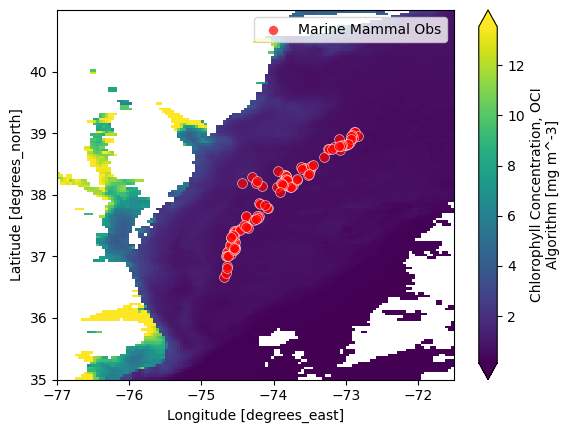

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

chl = ds['chlor_a']
chl_sub = chl.sel(
    lat=slice(41.0, 35),
    lon=slice(-77.0, -71.5)
)

# Plot chlorophyll
chl_sub.plot(robust=True)

# Get the current axes and add scatter points
ax = plt.gca()  # "get current axes"
ax.scatter(obs['longitude'], 
          obs['latitude'],
          c='red',
          s=50,
          alpha=0.7,
          edgecolors='white',
          linewidths=0.5,
          label='Marine Mammal Obs')

ax.legend()
plt.show()

### look at datasets

The plot above is for a single day, and that's not really anything we can work with for the full dataset which extends from Dec 28 to March 28. So we will need to look through to extract the appropriate data. 

We are leveraging the 3x3 section of code (though it is modified here to fit our use case) from the "matchups.ipynb." 1. What is the 3x3 box? A 3x3 pixel box means extracting 9 pixels (3×3 grid) centered on your observation point. This helps:

- Reduce noise from individual bad pixels (clouds, glint, etc.)
- Account for spatial uncertainty in the whale's exact position
- Better represent the environment the whale is actually experiencing (they move through a patch, not a single point) 


In [25]:
import earthaccess
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm

# Read your observations
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

# Convert date_time to datetime
obs['date'] = pd.to_datetime(obs['date_time']).dt.date
obs['date'] = pd.to_datetime(obs['date'])

# Get unique dates
unique_dates = obs['date'].unique()
print(f"Found {len(unique_dates)} unique observation dates")
print(f"Date range: {obs['date'].min()} to {obs['date'].max()}")

# Login to earthaccess
auth = earthaccess.login()

# Define your bounding box (lon_min, lat_min, lon_max, lat_max)
bounding_box = (-77.0, 35.5, -71.5, 41.0)

results_list = []

# Loop through unique dates
for date in tqdm(unique_dates, desc="Processing unique dates"):
    
    # For 8-day composites, search +/- 7 days
    start = (date - pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    end = (date + pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    
    try:
        results = earthaccess.search_data(
            short_name='PACE_OCI_L3M_CHL',
            temporal=(start, end),
            granule_name="*.8D.*.4km.*",
            bounding_box=bounding_box
        )
        
        if not results:
            print(f"No data found for {date}")
            continue
            
        fileset = earthaccess.open(results)
        
        for ea_file in fileset:
            with xr.open_dataset(ea_file, engine="h5netcdf") as ds:
                points_today = obs[obs['date'] == date]
                
                lat_vals = ds.lat.values
                lon_vals = ds.lon.values
                
                for idx, row in tqdm(points_today.iterrows(), 
                                    total=len(points_today), 
                                    desc=f"Points on {date.date()}", 
                                    leave=False):
                    
                    lat_center = row['latitude']
                    lon_center = row['longitude']
                    
                    # Find nearest indices for 3x3 box
                    lat_idx = np.abs(lat_vals - lat_center).argmin()
                    lon_idx = np.abs(lon_vals - lon_center).argmin()
                    
                    lat_slice = slice(max(lat_idx-1, 0), min(lat_idx+2, len(lat_vals)))
                    lon_slice = slice(max(lon_idx-1, 0), min(lon_idx+2, len(lon_vals)))
                    
                    # Extract chlorophyll from 3x3 box
                    chl_box = ds["chlor_a"].isel(lat=lat_slice, lon=lon_slice)
                    
                    # Calculate statistics
                    result_row = {
                        'Original_Index': idx,
                        'latitude':  lat_center,
                        'longitude': lon_center,
                        'date_time': row['date_time'],
                        'date': date,
                        'common_name': row['common_name'],
                        'scientific_name': row['scientific_name'],
                        'group_size': row['group_size'],
                        'chlor_a_mean': float(chl_box.mean(skipna=True).values),
                        'chlor_a_median': float(chl_box.median(skipna=True).values),
                        'chlor_a_std': float(chl_box.std(skipna=True).values),
                        'chlor_a_min': float(chl_box.min(skipna=True).values),
                        'chlor_a_max': float(chl_box.max(skipna=True).values),
                        'chlor_a_q25': float(chl_box.quantile(0.25, skipna=True).values),
                        'chlor_a_q75': float(chl_box.quantile(0.75, skipna=True).values)
                    }
                    results_list.append(result_row)
                    
    except Exception as e:
        print(f"Error processing {date}: {e}")
        continue

# Save results
if results_list:
    final_df = pd.DataFrame(results_list)
    output_file = "/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv"
    final_df.to_csv(output_file, index=False)
    print(f"\nCSV saved: {output_file}")
    print(f"Total matched observations: {len(final_df)}")
    
    # Display summary statistics
    print("\n=== Summary by Species ===")
    print(final_df.groupby('common_name')['chlor_a_median'].describe())
else:
    print("No data extracted.")

Found 19 unique observation dates
Date range: 2024-12-28 00:00:00 to 2025-03-28 00:00:00


Processing unique dates:   0%|          | 0/19 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2024-12-28:  50%|█████     | 1/2 [00:00<00:00,  2.84it/s]
                                                                   
Points on 2024-12-28:  50%|█████     | 1/2 [00:00<00:00,  2.68it/s]
                                                                   
Processing unique dates:   5%|▌         | 1/19 [00:11<03:18, 11.03s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-22:  62%|██████▎   | 10/16 [00:00<00:00, 35.70it/s]
                                                                     
Points on 2025-02-22:  62%|██████▎   | 10/16 [00:00<00:00, 49.72it/s]
                                                                     
Processing unique dates:  11%|█         | 2/19 [00:19<02:43,  9.63s/it]A

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-02-26:  14%|█▍        | 1/7 [00:00<00:00,  8.83it/s]
                                                                   
Processing unique dates:  16%|█▌        | 3/19 [00:26<02:11,  8.21s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-23: 100%|██████████| 9/9 [00:00<00:00, 39.35it/s]
                                                                   
Points on 2025-02-23:  22%|██▏       | 2/9 [00:00<00:00, 18.79it/s]
                                                                   
Processing unique dates:  21%|██        | 4/19 [00:33<02:00,  8.01s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-24:  12%|█▎        | 1/8 [00:00<00:00,  8.19it/s]
                                                                   
Points on 2025-02-24:  12%|█▎        | 1/8 [00:00<00:01,  5.14it/s]
                                                                   
Processing unique dates:  26%|██▋       | 5/19 [00:40<01:45,  7.56s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-02-18:  50%|█████     | 1/2 [00:00<00:00,  8.41it/s]
                                                                   
Processing unique dates:  32%|███▏      | 6/19 [00:47<01:33,  7.19s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-02-25:  11%|█         | 1/9 [00:00<00:01,  7.59it/s]
                                                                   
Processing unique dates:  37%|███▋      | 7/19 [00:53<01:24,  7.07s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-03: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]
                                                                   
Points on 2025-03-03: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]
                                                                   
Processing unique dates:  42%|████▏     | 8/19 [01:00<01:16,  6.98s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-01-24:  20%|██        | 1/5 [00:00<00:01,  3.29it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                                   
Processing unique dates:  47%|████▋     | 9/19 [01:08<01:12,  7.29s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-01-27:  17%|█▋        | 1/6 [00:00<00:00,  6.83it/s]
                                                                   
Points on 2025-01-27:  17%|█▋        | 1/6 [00:00<00:00,  7.82it/s]
                                                                   
Processing unique dates:  53%|█████▎    | 10/19 [01:16<01:06,  7.37s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-01-25:  12%|█▎        | 1/8 [00:00<00:00,  7.76it/s]
                                                                   
Processing unique dates:  58%|█████▊    | 11/19 [01:23<00:58,  7.33s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-19:  33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]
                                                                   
Points on 2025-03-19:  33%|███▎      | 1/3 [00:00<00:00,  3.44it/s]
                                                                   
Processing unique dates:  63%|██████▎   | 12/19 [01:30<00:50,  7.16s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-25: 100%|██████████| 9/9 [00:00<00:00, 27.11it/s]
                                                                   
Points on 2025-03-25: 100%|██████████| 9/9 [00:00<00:00, 43.41it/s]
                                                                   
Processing unique dates:  68%|██████▊   | 13/19 [01:38<00:44,  7.35s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-28:  17%|█▋        | 1/6 [00:00<00:00,  6.77it/s]
                                                                   
Points on 2025-03-28:  17%|█▋        | 1/6 [00:00<00:00,  7.87it/s]
                                                                   
Processing unique dates:  74%|███████▎  | 14/19 [01:45<00:36,  7.32s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-23:  75%|███████▌  | 9/12 [00:00<00:00, 44.23it/s]
                                                                    
Points on 2025-03-23:  67%|██████▋   | 8/12 [00:00<00:00, 43.79it/s]
                                                                    
Processing unique dates:  79%|███████▉  | 15/19 [01:52<00:29,  7.28s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-04:  50%|█████     | 1/2 [00:00<00:00,  6.91it/s]
                                                                   
Points on 2025-03-04:  50%|█████     | 1/2 [00:00<00:00,  5.20it/s]
                                                                   
Processing unique dates:  84%|████████▍ | 16/19 [01:59<00:21,  7.29s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-11:  11%|█         | 1/9 [00:00<00:01,  6.29it/s]
                                                                   
Points on 2025-03-11:  11%|█         | 1/9 [00:00<00:01,  4.84it/s]
                                                                   
Processing unique dates:  89%|████████▉ | 17/19 [02:06<00:14,  7.09s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-09:  33%|███▎      | 1/3 [00:00<00:00,  7.30it/s]
                                                                   
Points on 2025-03-09:  33%|███▎      | 1/3 [00:00<00:00,  4.19it/s]
                                                                   
Processing unique dates:  95%|█████████▍| 18/19 [02:13<00:06,  6.95s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-15:  25%|██▌       | 1/4 [00:00<00:00,  3.90it/s]
                                                                   
Points on 2025-02-15:  25%|██▌       | 1/4 [00:00<00:00,  6.50it/s]
                                                                   
Processing unique dates: 100%|██████████| 19/19 [02:19<00:00,  7.37s/it]



CSV saved: /home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv
Total matched observations: 332

=== Summary by Species ===
                            count      mean       std       min       25%  \
common_name                                                                 
Beaked whales                 6.0  0.755044  0.043125  0.722702  0.725019   
Blue whale                    4.0  0.825208  0.103315  0.735734  0.735734   
Common minke whale           21.0  0.666186  0.112187  0.485819  0.592772   
Fin whale                   151.0  0.671251  0.168489  0.284581  0.626950   
Humpback whale              125.0  0.697177  0.175398  0.280742  0.623202   
North Atlantic right whale    3.0  0.777797  0.082519  0.704336  0.733154   
Sperm whale                  21.0  0.644658  0.199937  0.274684  0.495857   

                                 50%       75%       max  
common_name                                               
Beaked whales               0.731970  

### Summary

With level 2 data, we need to use `xarray.open_datatree()` and then do a `merge` step to get all the variables in the groups. Note we can only work with one level 2 dataset at a time.
* `res=earthaccess.search_data()` with `bounding_box` to filter to the region of interest.
* `fileset=earthaccess.open(res)`
* `datatree=xarray.open_datatree(fileset[i])` to open the i-th file in the fileset.
* `ds=xarray.merge(datatree.to_dict().values())` to merge all the groups
* `ds = ds.set_coords(("longitude", "latitude"))` to make longitude and latitude coords (will help with plotting.

```
# Get L2 data
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L2_AOP',
    temporal = ("2025-03-05", "2025-03-05"),
    bounding_box = (-90.0, 40.0, -75.0, 47.0)
)
fileset = earthaccess.open(results)

# Open with the grouped netCDFs with open_datatree
datatree = xr.open_datatree(fileset[1], decode_timedelta=False)
ds_l2 = xr.merge(datatree.to_dict().values())
ds_l2 = ds_l2.set_coords(("longitude", "latitude"))
ds_l2
```

Next we get to plot the time series data yay!
We are also going to put together another few figures for dataset - as well as summary stats table. 


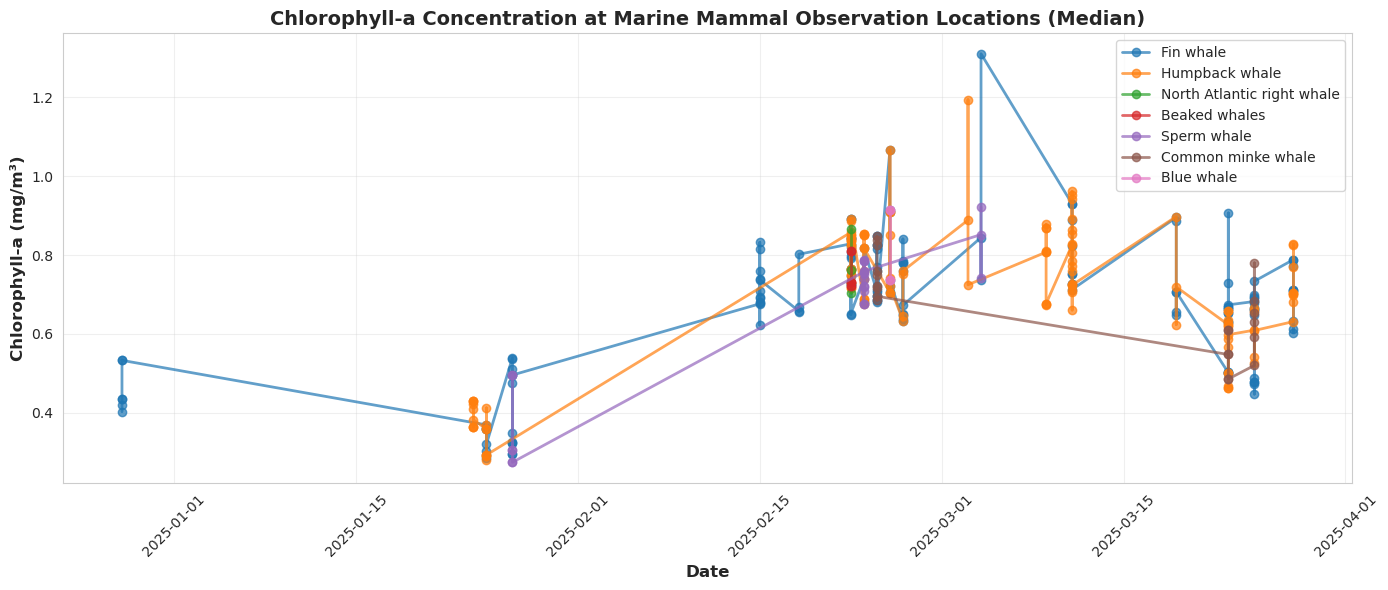

/tmp/ipykernel_90/3933292473.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([final_df[final_df['common_name'] == species]['chlor_a_median'].dropna()


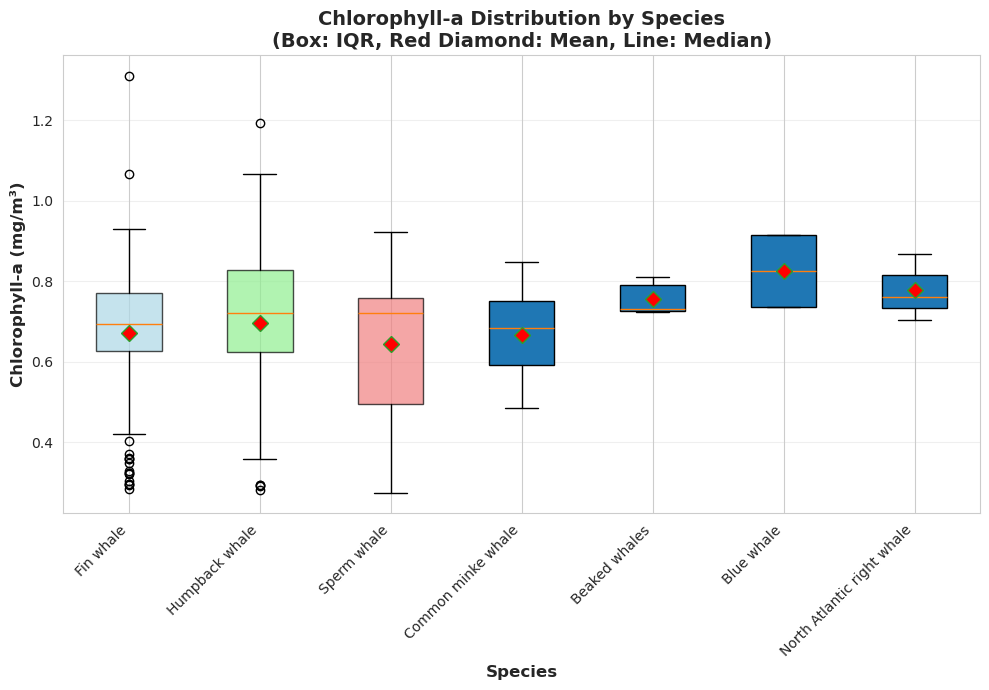

/tmp/ipykernel_90/3933292473.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_df,


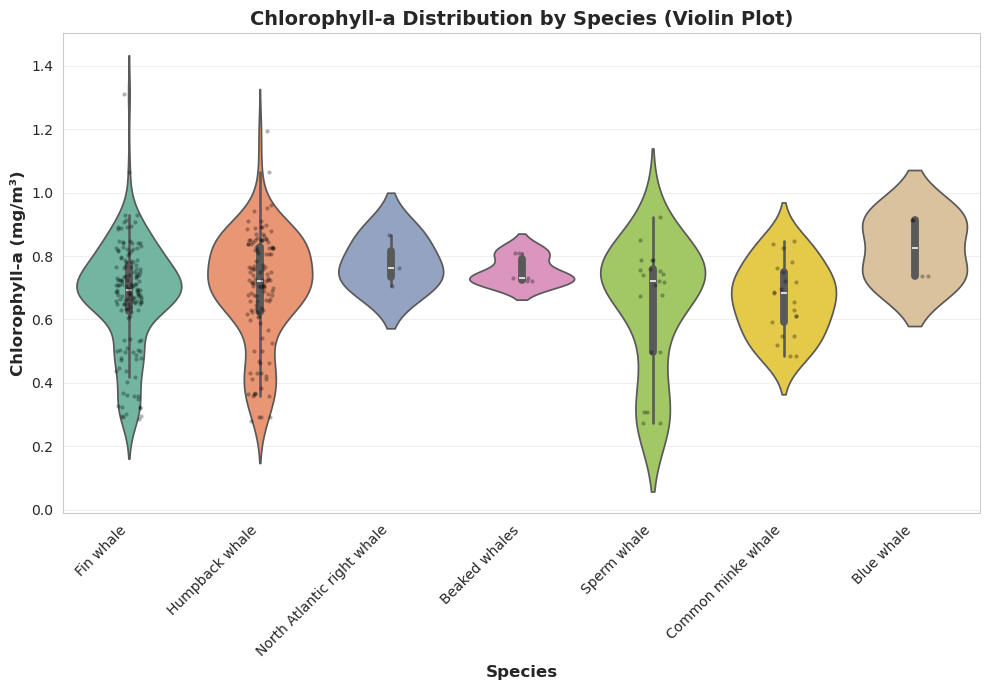


=== Chlorophyll Statistics by Species ===
                            Count   Mean  Median  Std Dev    Min    Max  \
common_name                                                               
Beaked whales                   6  0.755   0.732    0.043  0.723  0.810   
Blue whale                      4  0.825   0.825    0.103  0.736  0.915   
Common minke whale             21  0.666   0.684    0.112  0.486  0.847   
Fin whale                     151  0.671   0.692    0.168  0.285  1.310   
Humpback whale                125  0.697   0.722    0.175  0.281  1.193   
North Atlantic right whale      3  0.778   0.762    0.083  0.704  0.867   
Sperm whale                    21  0.645   0.721    0.200  0.275  0.922   

                              25%    75%  
common_name                               
Beaked whales               0.725  0.791  
Blue whale                  0.736  0.915  
Common minke whale          0.593  0.751  
Fin whale                   0.627  0.771  
Humpback whale         

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure we have the data
if results_list:
    final_df['date'] = pd.to_datetime(final_df['date'])
    
    # Set up the plotting style
    sns.set_style("whitegrid")

# Make sure we have the data
if results_list:
    final_df['date'] = pd.to_datetime(final_df['date'])
    
    # Set up the plotting style
    sns.set_style("whitegrid")
    
    # ===== PLOT 1: Time Series by Species =====
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot each species with median values
    for species in final_df['common_name'].unique():
        species_data = final_df[final_df['common_name'] == species].copy()
        species_data = species_data.sort_values('date')
        
        ax.plot(species_data['date'], 
                species_data['chlor_a_median'], 
                'o-', 
                label=species, 
                alpha=0.7,
                markersize=6,
                linewidth=2)
    
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Chlorophyll-a (mg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Chlorophyll-a Concentration at Marine Mammal Observation Locations (Median)', 
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/chlorophyll_timeseries.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 2: Box and Whisker Plot by Species =====
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Create box plot using median values
    species_order = final_df['common_name'].value_counts().index.tolist()
    
    bp = ax.boxplot([final_df[final_df['common_name'] == species]['chlor_a_median'].dropna() 
                      for species in species_order],
                     labels=species_order,
                     patch_artist=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel('Chlorophyll-a (mg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Chlorophyll-a Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
                 fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/chlorophyll_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 3: Alternative Violin Plot (shows distribution better) =====
    fig, ax = plt.subplots(figsize=(10, 7))
    
    sns.violinplot(data=final_df, 
                   x='common_name', 
                   y='chlor_a_median',
                   palette='Set2',
                   ax=ax)
    
    # Add individual points
    sns.stripplot(data=final_df, 
                  x='common_name', 
                  y='chlor_a_median',
                  color='black',
                  alpha=0.3,
                  size=3,
                  ax=ax)
    
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel('Chlorophyll-a (mg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Chlorophyll-a Distribution by Species (Violin Plot)', 
                 fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/chlorophyll_violinplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 4: Summary Statistics Table =====
    print("\n=== Chlorophyll Statistics by Species ===")
    summary = final_df.groupby('common_name')['chlor_a_median'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std Dev', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('25%', lambda x: x.quantile(0.25)),
        ('75%', lambda x: x.quantile(0.75))
    ]).round(3)
    print(summary)
    
    # Save summary to CSV
    summary.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/chlorophyll_summary_stats.csv')
    
else:
    print("No data to plot.")

Lets do a correlation between the values of chlorophyll and the group size of each observation. And also box plot for the group size values to see if anything there. 

Total observations for analysis: 331
Species found: ['Fin whale' 'Humpback whale' 'North Atlantic right whale' 'Beaked whales'
 'Sperm whale' 'Common minke whale' 'Blue whale']

CORRELATION ANALYSIS: Group Size vs Chlorophyll-a

Fin whale (n=151)
--------------------------------------------------
  Pearson correlation:  r = -0.180, p-value = 0.0267
  Spearman correlation: ρ = -0.118, p-value = 0.1503
  → No significant correlation (p ≥ 0.05)

Humpback whale (n=125)
--------------------------------------------------
  Pearson correlation:  r = -0.324, p-value = 0.0002
  Spearman correlation: ρ = -0.331, p-value = 0.0002
  → Significant negative correlation (p < 0.05)

North Atlantic right whale (n=3)
--------------------------------------------------
  Pearson correlation:  r = nan, p-value = nan
  Spearman correlation: ρ = nan, p-value = nan
  → No significant correlation (p ≥ 0.05)

Beaked whales (n=6)
--------------------------------------------------
  Pearson correlation:  r = nan,

/tmp/ipykernel_90/839632732.py:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = stats.pearsonr(species_data['group_size'],
/tmp/ipykernel_90/839632732.py:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = stats.spearmanr(species_data['group_size'],
/tmp/ipykernel_90/839632732.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([analysis_df[analysis_df['common_name'] == species]['chlor_a_median'].dropna()


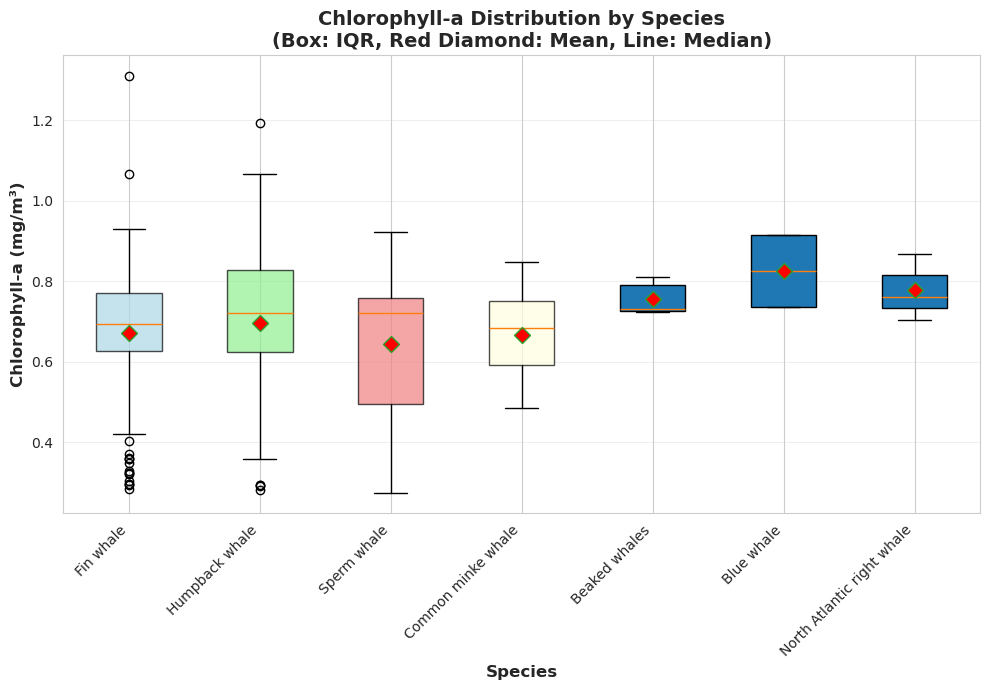

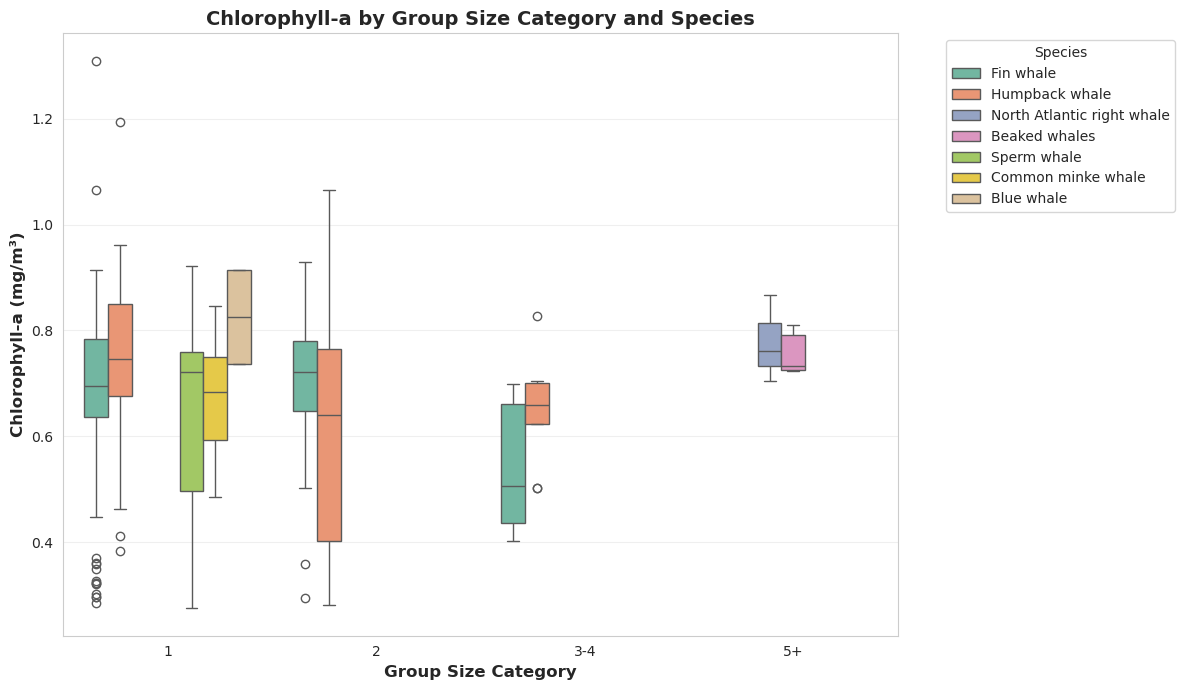


All plots saved successfully!


In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load your data
final_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv')

# Remove any NaN values in group_size or chlorophyll
analysis_df = final_df[['common_name', 'group_size', 'chlor_a_median']].dropna()

# Remove any observations with group_size = 0 if they exist
analysis_df = analysis_df[analysis_df['group_size'] > 0]

print(f"Total observations for analysis: {len(analysis_df)}")
print(f"Species found: {analysis_df['common_name'].unique()}")

# ===== STATISTICAL ANALYSIS: CORRELATION BY SPECIES =====
print("\n" + "="*70)
print("CORRELATION ANALYSIS: Group Size vs Chlorophyll-a")
print("="*70)

correlation_results = []

species_list = analysis_df['common_name'].unique()

for species in species_list:
    species_data = analysis_df[analysis_df['common_name'] == species]
    
    if len(species_data) > 2:
        # Pearson correlation (linear relationship)
        pearson_r, pearson_p = stats.pearsonr(species_data['group_size'], 
                                               species_data['chlor_a_median'])
        
        # Spearman correlation (monotonic relationship, more robust for discrete data)
        spearman_r, spearman_p = stats.spearmanr(species_data['group_size'], 
                                                  species_data['chlor_a_median'])
        
        print(f"\n{species} (n={len(species_data)})")
        print("-" * 50)
        print(f"  Pearson correlation:  r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")
        print(f"  Spearman correlation: ρ = {spearman_r:.3f}, p-value = {spearman_p:.4f}")
        
        # Interpretation
        if spearman_p < 0.05:  # Use Spearman for discrete data
            direction = "positive" if spearman_r > 0 else "negative"
            print(f"  → Significant {direction} correlation (p < 0.05)")
        else:
            print(f"  → No significant correlation (p ≥ 0.05)")
        
        correlation_results.append({
            'Species': species,
            'N': len(species_data),
            'Pearson_r': pearson_r,
            'Pearson_p': pearson_p,
            'Spearman_rho': spearman_r,
            'Spearman_p': spearman_p
        })

# Save correlation results
if correlation_results:
    corr_df = pd.DataFrame(correlation_results)
    corr_df.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_chlorophyll_correlations.csv', 
                   index=False)
    print("\n" + "="*70)
    print("Correlation results saved to groupsize_chlorophyll_correlations.csv")
    print("="*70)

# ===== PLOT 1: Box Plot by Species =====
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plot by species
species_order = analysis_df['common_name'].value_counts().index.tolist()

bp = ax.boxplot([analysis_df[analysis_df['common_name'] == species]['chlor_a_median'].dropna() 
                  for species in species_order],
                 labels=species_order,
                 patch_artist=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Chlorophyll-a (mg/m³)', fontsize=12, fontweight='bold')
ax.set_title('Chlorophyll-a Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/chlorophyll_by_species_boxplot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 2: Box Plot by Group Size Category and Species =====
# Bin group sizes into categories
analysis_df['group_size_category'] = pd.cut(analysis_df['group_size'], 
                                             bins=[0, 1, 2, 4, 100],
                                             labels=['1', '2', '3-4', '5+'])

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=analysis_df, 
            x='group_size_category', 
            y='chlor_a_median',
            hue='common_name',
            palette='Set2',
            ax=ax)

ax.set_xlabel('Group Size Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Chlorophyll-a (mg/m³)', fontsize=12, fontweight='bold')
ax.set_title('Chlorophyll-a by Group Size Category and Species', fontsize=14, fontweight='bold')
ax.legend(title='Species', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_categories_chlorophyll.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nAll plots saved successfully!")

## 3.Environmental Niche Comparison
The Environmental Niche Comparison quantifies whether different marine mammal species occupy distinct ecological niches by comparing the environmental conditions (chlorophyll concentration, chlorophyll variability, and geographic location) at observation sites. The analysis produces distribution histograms showing the frequency of observations across environmental gradients for each species, statistical tests (Kruskal-Wallis) to determine if species differ significantly in their habitat use, and niche overlap metrics (Pianka's index, 0-1 scale) that quantify how much species' environmental preferences overlap. High niche overlap (>0.7) suggests species are ecological generalists using similar habitats and may compete for resources, while low overlap (<0.4) indicates niche partitioning where species specialize in different conditions, reducing competition. The environmental space plots reveal whether species cluster in different regions of chlorophyll-latitude space, indicating habitat specialization, or if they overlap broadly, suggesting opportunistic habitat use. This analysis directly addresses whether marine mammal species in your study area are responding to environmental gradients in species-specific ways (requiring separate conservation strategies) or if they function as a generalized "marine mammal community" with similar habitat requirements (allowing for unified management approaches). The results provide the ecological justification for whether subsequent analyses should be species-specific or can be conducted on pooled data.

ENVIRONMENTAL NICHE ANALYSIS

Chlorophyll Conditions by Species:
                           chlor_a_median                              \
                                    count   mean    std    min    max   
common_name                                                             
Beaked whales                           6  0.755  0.043  0.723  0.810   
Blue whale                              4  0.825  0.103  0.736  0.915   
Common minke whale                     21  0.666  0.112  0.486  0.847   
Fin whale                             151  0.671  0.168  0.285  1.310   
Humpback whale                        125  0.697  0.175  0.281  1.193   
North Atlantic right whale              3  0.778  0.083  0.704  0.867   
Sperm whale                            21  0.645  0.200  0.275  0.922   

                           chlor_a_std        latitude        longitude         
                                  mean    std     mean    std      mean    std  
common_name                               

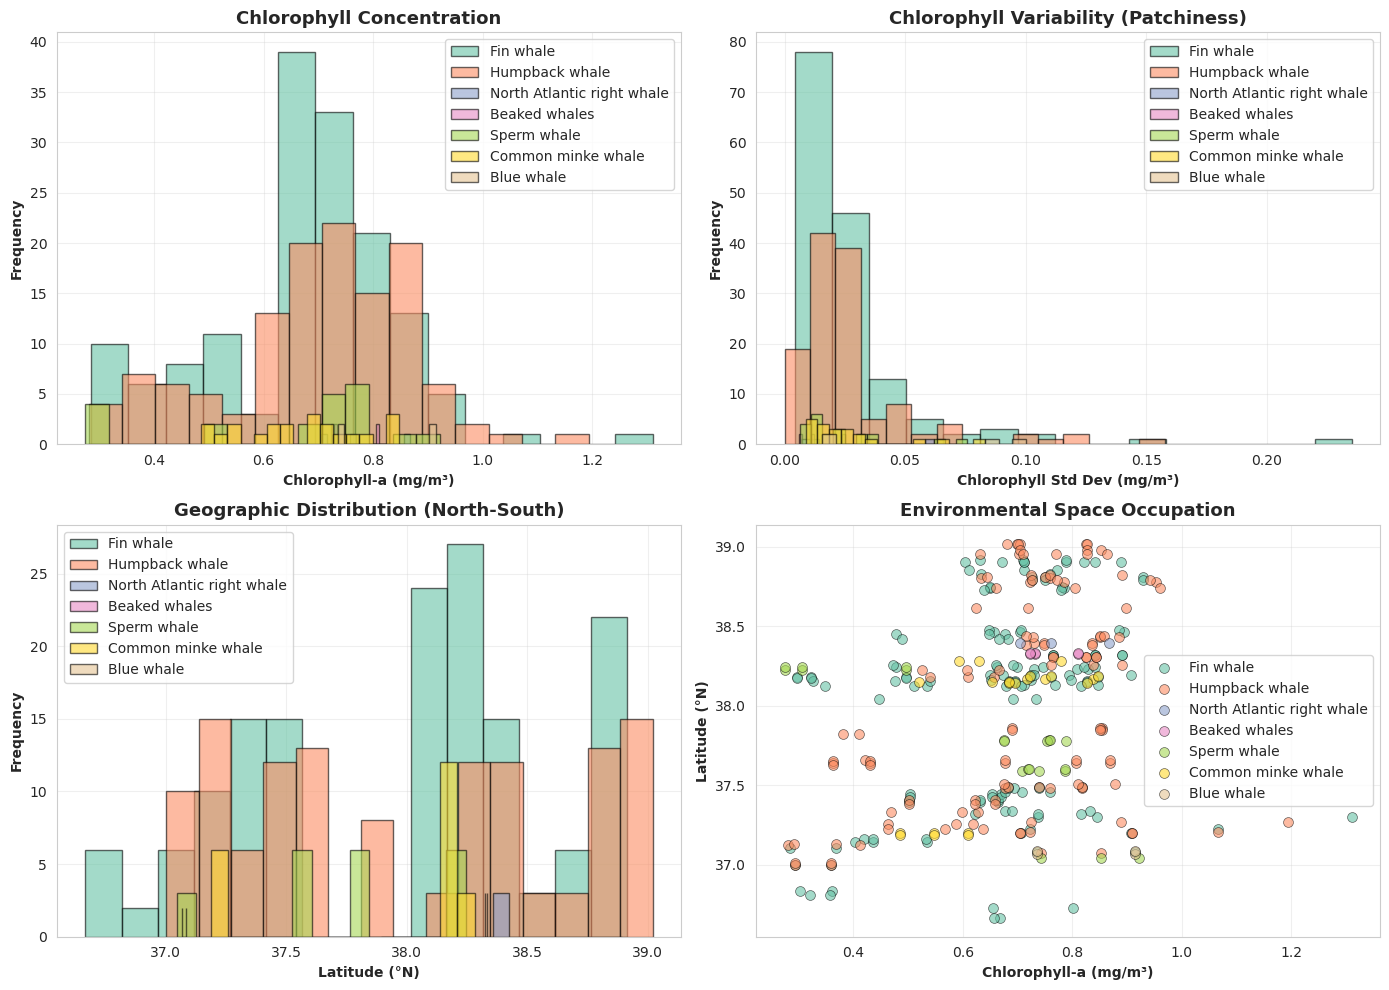


STATISTICAL COMPARISON: Do species use different habitats?

Chlorophyll concentration:
  H-statistic: 10.916
  p-value: 0.0910
  → No significant difference between species (p ≥ 0.05)

Latitude (geographic distribution):
  H-statistic: 19.990
  p-value: 0.0028
  → Species differ significantly in latitude (p < 0.05)

NICHE OVERLAP ANALYSIS

Chlorophyll Niche Overlap (0 = no overlap, 1 = complete overlap):
  Fin whale vs Humpback whale: 0.508
  Fin whale vs North Atlantic right whale: 0.300
  Fin whale vs Beaked whales: 0.150
  Fin whale vs Sperm whale: 0.540
  Fin whale vs Common minke whale: 0.422
  Fin whale vs Blue whale: 0.308
  Humpback whale vs North Atlantic right whale: 0.332
  Humpback whale vs Beaked whales: 0.153
  Humpback whale vs Sperm whale: 0.590
  Humpback whale vs Common minke whale: 0.397
  Humpback whale vs Blue whale: 0.366
  North Atlantic right whale vs Beaked whales: 0.166
  North Atlantic right whale vs Sperm whale: 0.306
  North Atlantic right whale vs Common 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load your data
df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv')

# Clean data
df_clean = df[['common_name', 'latitude', 'longitude', 
               'chlor_a_median', 'chlor_a_std']].dropna()

print("="*70)
print("ENVIRONMENTAL NICHE ANALYSIS")
print("="*70)

# Summary statistics by species
print("\nChlorophyll Conditions by Species:")
summary = df_clean.groupby('common_name').agg({
    'chlor_a_median': ['count', 'mean', 'std', 'min', 'max'],
    'chlor_a_std': ['mean', 'std'],
    'latitude': ['mean', 'std'],
    'longitude': ['mean', 'std']
}).round(3)

print(summary)

# ===== VISUALIZATION 1: Multi-panel Environmental Comparison =====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

species_list = df_clean['common_name'].unique()
colors = sns.color_palette("Set2", len(species_list))

# Panel 1: Chlorophyll Distribution
ax1 = axes[0, 0]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['chlor_a_median']
    ax1.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax1.set_xlabel('Chlorophyll-a (mg/m³)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Chlorophyll Concentration', fontweight='bold', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel 2: Chlorophyll Variability
ax2 = axes[0, 1]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['chlor_a_std']
    ax2.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax2.set_xlabel('Chlorophyll Std Dev (mg/m³)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Chlorophyll Variability (Patchiness)', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: Latitude Distribution
ax3 = axes[1, 0]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['latitude']
    ax3.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax3.set_xlabel('Latitude (°N)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Geographic Distribution (North-South)', fontweight='bold', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: 2D Environmental Space
ax4 = axes[1, 1]
for species, color in zip(species_list, colors):
    species_data = df_clean[df_clean['common_name'] == species]
    ax4.scatter(species_data['chlor_a_median'], 
                species_data['latitude'],
                alpha=0.6, s=50, label=species, color=color,
                edgecolors='black', linewidths=0.5)
ax4.set_xlabel('Chlorophyll-a (mg/m³)', fontweight='bold')
ax4.set_ylabel('Latitude (°N)', fontweight='bold')
ax4.set_title('Environmental Space Occupation', fontweight='bold', fontsize=13)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Environmental_Niche_Comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== STATISTICAL TESTS: Do species differ in habitat use? =====
print("\n" + "="*70)
print("STATISTICAL COMPARISON: Do species use different habitats?")
print("="*70)

# Kruskal-Wallis test (non-parametric ANOVA)
from scipy.stats import kruskal

# Test for chlorophyll
groups_chl = [df_clean[df_clean['common_name'] == sp]['chlor_a_median'].values 
              for sp in species_list]
h_stat_chl, p_val_chl = kruskal(*groups_chl)

print(f"\nChlorophyll concentration:")
print(f"  H-statistic: {h_stat_chl:.3f}")
print(f"  p-value: {p_val_chl:.4f}")
if p_val_chl < 0.05:
    print("  → Species differ significantly in chlorophyll use (p < 0.05)")
else:
    print("  → No significant difference between species (p ≥ 0.05)")

# Test for latitude
groups_lat = [df_clean[df_clean['common_name'] == sp]['latitude'].values 
              for sp in species_list]
h_stat_lat, p_val_lat = kruskal(*groups_lat)

print(f"\nLatitude (geographic distribution):")
print(f"  H-statistic: {h_stat_lat:.3f}")
print(f"  p-value: {p_val_lat:.4f}")
if p_val_lat < 0.05:
    print("  → Species differ significantly in latitude (p < 0.05)")
else:
    print("  → No significant difference between species (p ≥ 0.05)")

# ===== NICHE OVERLAP CALCULATION =====
print("\n" + "="*70)
print("NICHE OVERLAP ANALYSIS")
print("="*70)

# Calculate overlap in chlorophyll use between species pairs
from scipy.stats import gaussian_kde

def calculate_overlap(species1_data, species2_data):
    """Calculate niche overlap using kernel density estimation"""
    # Create range for evaluation
    x_min = min(species1_data.min(), species2_data.min())
    x_max = max(species1_data.max(), species2_data.max())
    x = np.linspace(x_min, x_max, 1000)
    
    # Kernel density estimation
    kde1 = gaussian_kde(species1_data)
    kde2 = gaussian_kde(species2_data)
    
    # Evaluate densities
    density1 = kde1(x)
    density2 = kde2(x)
    
    # Calculate overlap (Pianka's index)
    overlap = np.sum(np.minimum(density1, density2)) / np.sqrt(
        np.sum(density1**2) * np.sum(density2**2))
    
    return overlap

if len(species_list) >= 2:
    print("\nChlorophyll Niche Overlap (0 = no overlap, 1 = complete overlap):")
    for i, sp1 in enumerate(species_list):
        for sp2 in species_list[i+1:]:
            data1 = df_clean[df_clean['common_name'] == sp1]['chlor_a_median'].values
            data2 = df_clean[df_clean['common_name'] == sp2]['chlor_a_median'].values
            overlap = calculate_overlap(data1, data2)
            print(f"  {sp1} vs {sp2}: {overlap:.3f}")

# Save summary statistics
summary.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Species_Environmental_Summary.csv')

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

Interpretation of results: The analysis reveals that marine mammal species in your study area differentiate their niches primarily through geographic location rather than chlorophyll conditions. While all species occupy a similar range of chlorophyll concentrations (mean 0.64-0.83 mg/m³) with no significant differences between them (p = 0.091), they show significant geographic separation by latitude (p = 0.0028), with species like Blue whales and Sperm whales occurring farther south (~37°N) and Beaked whales and North Atlantic right whales farther north (~38.3-38.4°N). Niche overlap values are generally moderate to low (0.15-0.59), with the two most abundant species—Fin whales and Humpback whales—showing moderate overlap (0.508), indicating they use similar but not identical habitats and may partition resources through fine-scale spatial or temporal differences. Beaked whales are the most distinct, with very low overlap with all other species (<0.17), likely reflecting their deep-water, offshore specialization. The key ecological insight is that these species coexist not by specializing in different productivity regimes, but by occupying different geographic zones within the shelf-slope system, suggesting that bathymetric features (depth, distance to shore, shelf break position) rather than surface productivity drive niche partitioning. This supports analyzing species separately in subsequent models, as each appears to respond to location-specific features rather than following a universal relationship with chlorophyll.

ENVIRONMENTAL + TEMPORAL NICHE ANALYSIS

Summary by Species (Environmental + Temporal):
                            chlor_mean  chlor_std  chlor_min  chlor_max  \
common_name                                                               
Beaked whales                    0.755      0.043      0.723      0.810   
Blue whale                       0.825      0.103      0.736      0.915   
Common minke whale               0.666      0.112      0.486      0.847   
Fin whale                        0.671      0.168      0.285      1.310   
Humpback whale                   0.697      0.175      0.281      1.193   
North Atlantic right whale       0.778      0.083      0.704      0.867   
Sperm whale                      0.645      0.200      0.275      0.922   

                            doy_mean  doy_std  month_mean  latitude_mean  
common_name                                                               
Beaked whales                 53.000    0.000       2.000         38.329  
Blue whale 

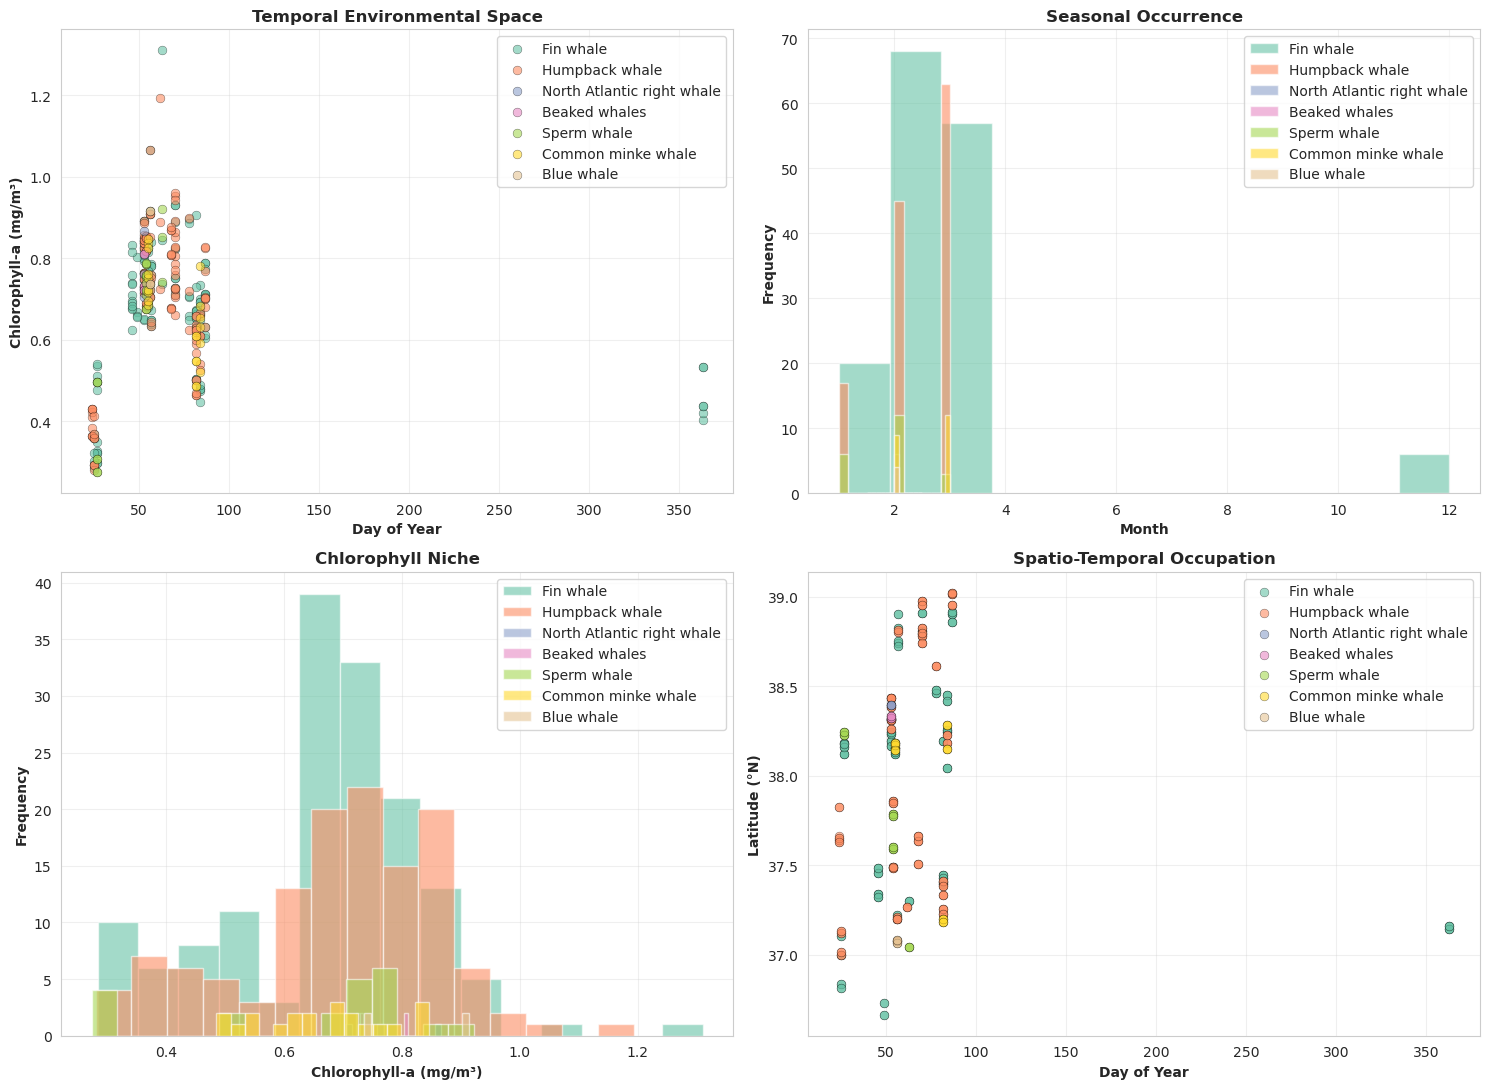


STATISTICAL COMPARISONS

Timing (Day of Year):
  H-statistic: 22.204
  p-value: 0.0011

Chlorophyll:
  H-statistic: 10.916
  p-value: 0.0910

TEMPORAL NICHE OVERLAP (DOY)
Fin whale vs Humpback whale: 60.343
Fin whale vs North Atlantic right whale: nan


/tmp/ipykernel_90/2392686448.py:198: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.minimum(d1, d2)) / np.sqrt(np.sum(d1**2) * np.sum(d2**2))


Fin whale vs Beaked whales: nan
Fin whale vs Sperm whale: 39.512
Fin whale vs Common minke whale: 48.642


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from scipy.stats import gaussian_kde

# =========================
# LOAD DATA
# =========================
df = pd.read_csv(
    '/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv'
)

# =========================
# TIME HANDLING
# =========================
# CHANGE THIS COLUMN NAME IF NEEDED
df['date'] = pd.to_datetime(df['date'])

# Create useful temporal variables
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['doy'] = df['date'].dt.dayofyear  # seasonality proxy

# =========================
# CLEAN DATA
# =========================
df_clean = df[
    [
        'common_name',
        'chlor_a_median',
        'chlor_a_std',
        'latitude',
        'longitude',
        'year',
        'month',
        'doy'
    ]
].dropna()

species_list = df_clean['common_name'].unique()

print("=" * 70)
print("ENVIRONMENTAL + TEMPORAL NICHE ANALYSIS")
print("=" * 70)

# =========================
# SUMMARY STATISTICS
# =========================
print("\nSummary by Species (Environmental + Temporal):")

summary = df_clean.groupby('common_name').agg(
    chlor_mean=('chlor_a_median', 'mean'),
    chlor_std=('chlor_a_median', 'std'),
    chlor_min=('chlor_a_median', 'min'),
    chlor_max=('chlor_a_median', 'max'),
    doy_mean=('doy', 'mean'),
    doy_std=('doy', 'std'),
    month_mean=('month', 'mean'),
    latitude_mean=('latitude', 'mean')
).round(3)

print(summary)

# =========================
# VISUALIZATION
# =========================
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
colors = sns.color_palette("Set2", len(species_list))

# -------------------------
# PANEL 1: Chlorophyll vs Time (DOY)
# -------------------------
ax1 = axes[0, 0]
for sp, color in zip(species_list, colors):
    sp_data = df_clean[df_clean['common_name'] == sp]
    ax1.scatter(
        sp_data['doy'],
        sp_data['chlor_a_median'],
        alpha=0.6,
        s=40,
        label=sp,
        color=color,
        edgecolors='black',
        linewidths=0.3
    )

ax1.set_xlabel('Day of Year', fontweight='bold')
ax1.set_ylabel('Chlorophyll-a (mg/m³)', fontweight='bold')
ax1.set_title('Temporal Environmental Space', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# -------------------------
# PANEL 2: Seasonal Distribution
# -------------------------
ax2 = axes[0, 1]
for sp, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == sp]['month']
    ax2.hist(data, bins=12, alpha=0.6, color=color, label=sp)

ax2.set_xlabel('Month', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Seasonal Occurrence', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# -------------------------
# PANEL 3: Chlorophyll Distribution
# -------------------------
ax3 = axes[1, 0]
for sp, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == sp]['chlor_a_median']
    ax3.hist(data, bins=15, alpha=0.6, color=color, label=sp)

ax3.set_xlabel('Chlorophyll-a (mg/m³)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Chlorophyll Niche', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# -------------------------
# PANEL 4: Time vs Latitude (Spatio-temporal niche)
# -------------------------
ax4 = axes[1, 1]
for sp, color in zip(species_list, colors):
    sp_data = df_clean[df_clean['common_name'] == sp]
    ax4.scatter(
        sp_data['doy'],
        sp_data['latitude'],
        alpha=0.6,
        s=40,
        color=color,
        label=sp,
        edgecolors='black',
        linewidths=0.3
    )

ax4.set_xlabel('Day of Year', fontweight='bold')
ax4.set_ylabel('Latitude (°N)', fontweight='bold')
ax4.set_title('Spatio-Temporal Occupation', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Temporal_Environmental_Niche.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

# =========================
# STATISTICAL TESTS
# =========================
print("\n" + "=" * 70)
print("STATISTICAL COMPARISONS")
print("=" * 70)

# ---- DOY differences ----
groups_doy = [
    df_clean[df_clean['common_name'] == sp]['doy'].values
    for sp in species_list
]

h_doy, p_doy = kruskal(*groups_doy)

print("\nTiming (Day of Year):")
print(f"  H-statistic: {h_doy:.3f}")
print(f"  p-value: {p_doy:.4f}")

# ---- Chlorophyll differences ----
groups_chl = [
    df_clean[df_clean['common_name'] == sp]['chlor_a_median'].values
    for sp in species_list
]

h_chl, p_chl = kruskal(*groups_chl)

print("\nChlorophyll:")
print(f"  H-statistic: {h_chl:.3f}")
print(f"  p-value: {p_chl:.4f}")

# =========================
# TEMPORAL NICHE OVERLAP
# =========================
print("\n" + "=" * 70)
print("TEMPORAL NICHE OVERLAP (DOY)")
print("=" * 70)

def niche_overlap(x1, x2):
    x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)
    kde1 = gaussian_kde(x1)
    kde2 = gaussian_kde(x2)
    d1 = kde1(x)
    d2 = kde2(x)
    return np.sum(np.minimum(d1, d2)) / np.sqrt(np.sum(d1**2) * np.sum(d2**2))

for i, sp1 in enumerate(species_list):
    for sp2 in species_list[i+1:]:
        d1 = df_clean[df_clean['common_name'] == sp1]['doy'].values
        d2 = df_clean[df_clean['common_name'] == sp2]['doy'].values
        overlap = niche_overlap(d1, d2)
        print(f"{sp1} vs {sp2}: {overlap:.3f}")

# =========================
# SAVE OUTPUTS
# =========================
summary.to_csv(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Species_Temporal_Environmental_Summary.csv'
)

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)


TEMPORAL (Dec–Mar) × CHLOROPHYLL NICHE ANALYSIS

Summary by species:
                            n_obs  chl_mean  chl_std  chl_min  chl_max  \
common_name                                                              
Beaked whales                   6     0.755    0.043    0.723    0.810   
Blue whale                      4     0.825    0.103    0.736    0.915   
Common minke whale             21     0.666    0.112    0.486    0.847   
Fin whale                     151     0.671    0.168    0.285    1.310   
Humpback whale                125     0.697    0.175    0.281    1.193   
North Atlantic right whale      3     0.778    0.083    0.704    0.867   
Sperm whale                    21     0.645    0.200    0.275    0.922   

                            time_mean  time_std  
common_name                                      
Beaked whales                  83.000     0.000  
Blue whale                     86.000     0.000  
Common minke whale            101.571    14.726  
Fin whale     

/tmp/ipykernel_90/2278334597.py:109: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_90/2278334597.py:109: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_90/2278334597.py:109: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


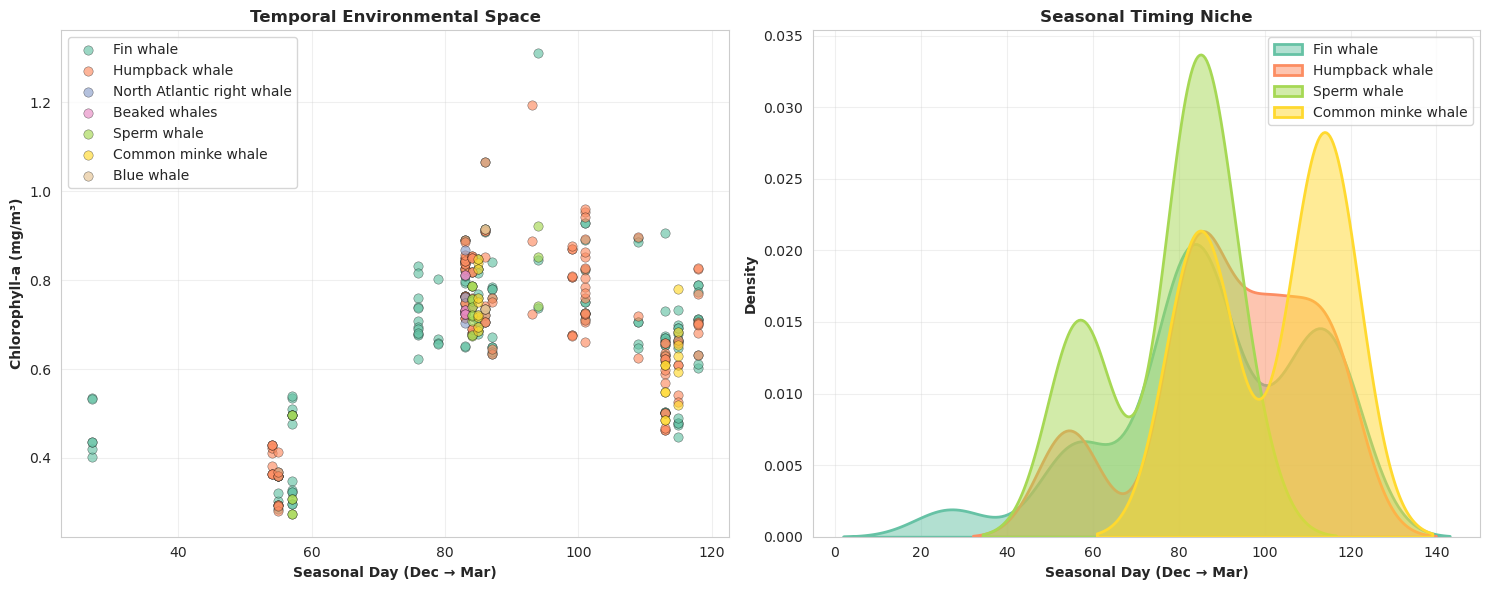


STATISTICAL COMPARISONS

Seasonal timing (Dec–Mar):
  H-statistic: 22.580
  p-value: 0.0009

Chlorophyll:
  H-statistic: 10.916
  p-value: 0.0910

TEMPORAL NICHE OVERLAP (Dec–Mar)
Fin whale vs Humpback whale: 61.562


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal, gaussian_kde

# =========================
# LOAD DATA
# =========================
df = pd.read_csv(
    '/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv'
)

# =========================
# TIME HANDLING
# =========================
# CHANGE COLUMN NAME IF NEEDED
df['date'] = pd.to_datetime(df['date'])

# Extract components
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# =========================
# CREATE CONTINUOUS Dec–Mar TIME AXIS
# =========================
# Dec = 0–30, Jan = 31–61, Feb = 62–90, Mar = 91–121
month_offsets = {
    12: 0,    # December
    1: 31,    # January
    2: 62,    # February
    3: 91     # March
}

df['seasonal_doy'] = df.apply(
    lambda row: month_offsets.get(row['month'], np.nan) + row['day'] - 1,
    axis=1
)

# =========================
# CLEAN DATA
# =========================
df_clean = df[
    [
        'common_name',
        'chlor_a_median',
        'chlor_a_std',
        'seasonal_doy'
    ]
].dropna()

species_list = df_clean['common_name'].unique()

print("=" * 70)
print("TEMPORAL (Dec–Mar) × CHLOROPHYLL NICHE ANALYSIS")
print("=" * 70)

# =========================
# SUMMARY STATISTICS
# =========================
summary = df_clean.groupby('common_name').agg(
    n_obs=('chlor_a_median', 'count'),
    chl_mean=('chlor_a_median', 'mean'),
    chl_std=('chlor_a_median', 'std'),
    chl_min=('chlor_a_median', 'min'),
    chl_max=('chlor_a_median', 'max'),
    time_mean=('seasonal_doy', 'mean'),
    time_std=('seasonal_doy', 'std')
).round(3)

print("\nSummary by species:")
print(summary)

# =========================
# VISUALIZATION
# =========================
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = sns.color_palette("Set2", len(species_list))

# -------------------------
# PANEL 1: DOY × Chlorophyll Scatter
# -------------------------
ax1 = axes[0]
for sp, color in zip(species_list, colors):
    sp_data = df_clean[df_clean['common_name'] == sp]
    ax1.scatter(
        sp_data['seasonal_doy'],
        sp_data['chlor_a_median'],
        s=45,
        alpha=0.65,
        label=sp,
        color=color,
        edgecolors='black',
        linewidths=0.3
    )

ax1.set_xlabel('Seasonal Day (Dec → Mar)', fontweight='bold')
ax1.set_ylabel('Chlorophyll-a (mg/m³)', fontweight='bold')
ax1.set_title('Temporal Environmental Space', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# -------------------------
# PANEL 2: Temporal Niche Density
# -------------------------
ax2 = axes[1]
for sp, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == sp]['seasonal_doy']
    sns.kdeplot(
        data,
        ax=ax2,
        fill=True,
        alpha=0.5,
        linewidth=2,
        label=sp,
        color=color
    )

ax2.set_xlabel('Seasonal Day (Dec → Mar)', fontweight='bold')
ax2.set_ylabel('Density', fontweight='bold')
ax2.set_title('Seasonal Timing Niche', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/DOY_Chlorophyll_Niche.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

# =========================
# STATISTICAL TESTS
# =========================
print("\n" + "=" * 70)
print("STATISTICAL COMPARISONS")
print("=" * 70)

# ---- Timing differences ----
groups_time = [
    df_clean[df_clean['common_name'] == sp]['seasonal_doy'].values
    for sp in species_list
]

h_time, p_time = kruskal(*groups_time)

print("\nSeasonal timing (Dec–Mar):")
print(f"  H-statistic: {h_time:.3f}")
print(f"  p-value: {p_time:.4f}")

# ---- Chlorophyll differences ----
groups_chl = [
    df_clean[df_clean['common_name'] == sp]['chlor_a_median'].values
    for sp in species_list
]

h_chl, p_chl = kruskal(*groups_chl)

print("\nChlorophyll:")
print(f"  H-statistic: {h_chl:.3f}")
print(f"  p-value: {p_chl:.4f}")

# =========================
# TEMPORAL NICHE OVERLAP
# =========================
print("\n" + "=" * 70)
print("TEMPORAL NICHE OVERLAP (Dec–Mar)")
print("=" * 70)

def niche_overlap(x1, x2):
    x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)
    kde1 = gaussian_kde(x1)
    kde2 = gaussian_kde(x2)
    d1 = kde1(x)
    d2 = kde2(x)
    return np.sum(np.minimum(d1, d2)) / np.sqrt(np.sum(d1**2) * np.sum(d2**2))

for i, sp1 in enumerate(species_list):
    for sp2 in species_list[i+1:]:
        d1 = df_clean[df_clean['common_name'] == sp1]['seasonal_doy'].values
        d2 = df_clean[df_clean['common_name'] == sp2]['seasonal_doy'].values
        overlap = niche_overlap(d1, d2)
        print(f"{sp1} vs {sp2}: {overlap:.3f}")

# =========================
# SAVE SUMMARY
# =========================
summary.to_csv(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Species_DOY_Chlorophyll_Summary.csv'
)

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)
